In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

In [2]:
generate_default_plot_env()

In [3]:
barplot_df = pd.read_csv('../data/effects_across_demographics.csv')

In [4]:
barplot_df['x_pos'] = [0.]*2 + [1.5]*2 + [2.5]*2 + [3.5]*2 + [5.]*2 + [6.]*2 + [7.]*2 + [8.5]*2 + [9.5]*2 + [10.5]*2

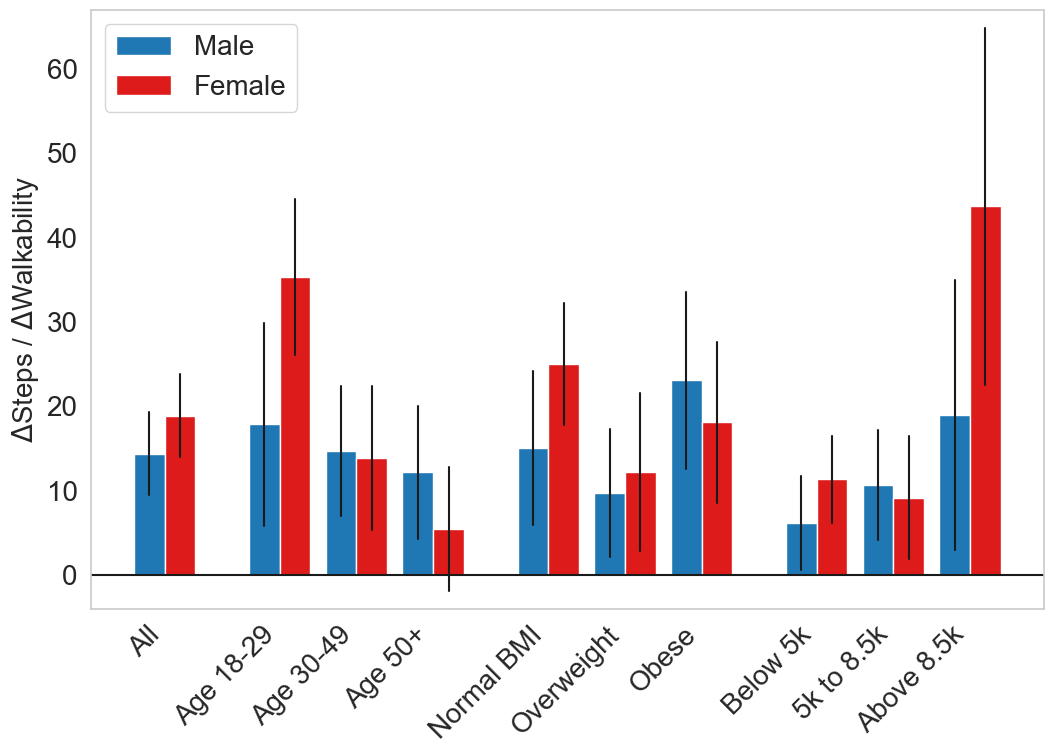

In [6]:
fig, ax = plt.subplots()

male_x_pos = barplot_df.loc[barplot_df['Gender'] == 'Male', "x_pos"].values
regress_type = barplot_df.loc[barplot_df['Gender'] == 'Male', "regress_type"].values
female_x_pos = barplot_df.loc[barplot_df['Gender'] == 'Female', "x_pos"].values

palette = {'Male': '#1f78b4',
            'Female': '#de1b1b'}
rect1 = ax.bar(male_x_pos - 0.2,
       barplot_df.loc[barplot_df['Gender'] == 'Male', "coeffs"].values,
       width=0.4,
       color=palette['Male'])
rect2 = ax.bar(female_x_pos + 0.2,
       barplot_df.loc[barplot_df['Gender'] == 'Female', "coeffs"].values, 
       width=0.4,
       color=palette['Female'])
for i in range(0, len(barplot_df), 2):
    ax.plot((male_x_pos[i//2]-0.2, male_x_pos[i//2]-0.2), (barplot_df['conf_int_low'][i], barplot_df['conf_int_high'][i]), 'k-')
    ax.plot((female_x_pos[i//2]+0.2, female_x_pos[i//2]+0.2), (barplot_df['conf_int_low'][i+1], barplot_df['conf_int_high'][i+1]), 'k-')

ax.set_xlabel('')
ax.set_xticks(male_x_pos)
ax.set_xticklabels(regress_type, ha='right')
ax.set_ylabel('$\Delta$Steps / $\Delta$Walkability')
ax.grid(False)
ax.set_ylim(-4, 67)

plt.axhline(y=0, color='k')
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
for item in ([ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.legend([rect1[0], rect2[0]], ['Male', 'Female'], prop={'size': 20})
figure = plt.gcf() # get current figure
figure.set_size_inches(11, 8)
plt.tight_layout()
plt.savefig('../output/fig2b.pdf', dpi=300)